In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\Z I M B A\Downloads\car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.isna().sum()#to find missing values

Year     0
Price    0
dtype: int64

In [7]:
#to find outliers


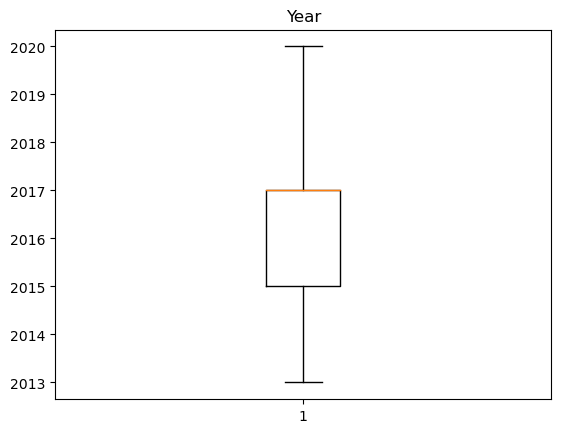

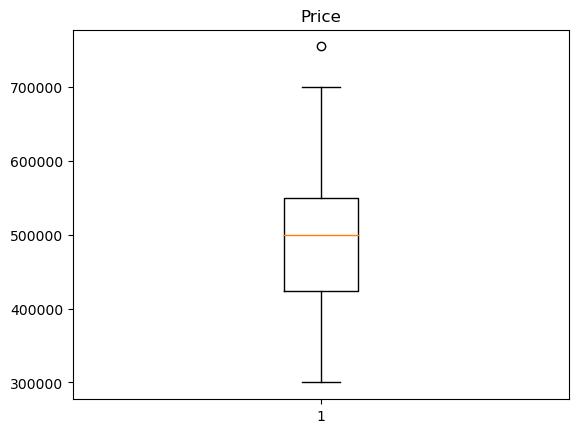

In [8]:
nm_cl=['Year','Price']
for i in nm_cl:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [9]:
#trimming the outliers of price
Q1=data['Price'].quantile(0.25)
Q3=data['Price'].quantile(0.75)
IQR=Q3-Q1
lw_whisker=Q1-1.5*IQR
upp_whisker=Q3+1.5*IQR
data['Price']=np.where(data['Price']>upp_whisker,upp_whisker,np.where(data['Price']<lw_whisker,lw_whisker,data['Price']))


Text(0.5, 1.0, 'Price')

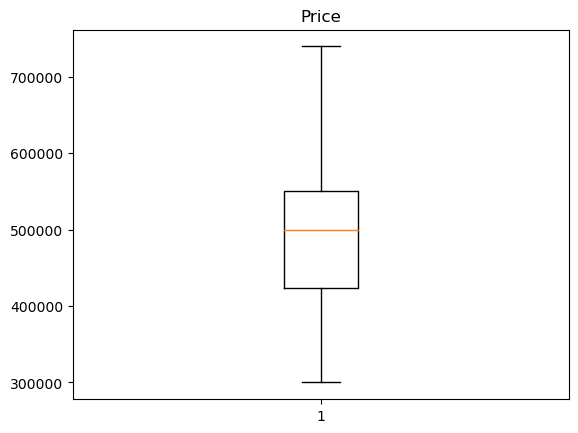

In [10]:
plt.boxplot(data['Price'])
plt.title('Price')

In [57]:
data.corr()

,Year,Price
Year,1.000000,0.809377
Price,0.809377,1.000000


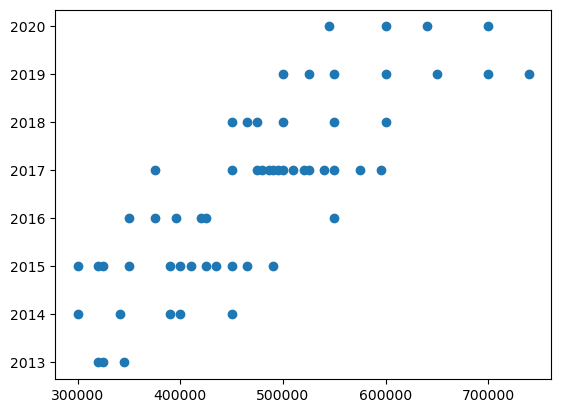

In [58]:
plt.scatter(data['Price'],data['Year'])
plt.show()

the above plot shows the linear relationship between price and year

In [14]:
data['Year'].value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

In [15]:
duplicate=data[data.duplicated()]

In [17]:
duplicate.head()

,Year,Price
3,2018,465000.0
4,2018,465000.0
9,2017,575000.0
15,2017,500000.0
16,2017,500000.0


In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.shape

(58, 2)

In [22]:
data['Year'].value_counts()

2017    15
2015    12
2019     7
2018     6
2016     6
2014     5
2020     4
2013     3
Name: Year, dtype: int64

# Linear Regression model

In [25]:
x=data.drop(['Price'],axis=1)

In [27]:
x.head()

,Year
0,2018
1,2019
2,2019
5,2015
6,2016


In [28]:
y=data['Price']

In [29]:
y.head()

0    465000.0
1    739375.0
2    700000.0
5    350000.0
6    425000.0
Name: Price, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [32]:
from sklearn.linear_model import LinearRegression

In [35]:
lr=LinearRegression()
lr_model=lr.fit(x_train,y_train)
lr_predict=lr_model.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error,r2_score

In [37]:
print("Mean squared error= ",mean_squared_error(y_test,lr_predict))
print("R Squared error= ",r2_score(y_test,lr_predict))

Mean squared error=  3547780499.120655
R Squared error=  0.7257165296502877


# Lasso Regression Model


In [39]:
from sklearn.linear_model import Lasso


In [40]:
lasso=Lasso(alpha=0.1)

In [41]:
ls_model=lasso.fit(x_train,y_train)

In [42]:
ls_predict=ls_model.predict(x_test)

In [43]:
print("Mean squared error= ",mean_squared_error(y_test,ls_predict))
print("R squared error= ",r2_score(y_test,ls_predict))

Mean squared error=  3547781854.8532796
R squared error=  0.7257164248368558


# Prediction of the Price in the year 2022(Using Linear Regression)

In [49]:
x_2022=pd.DataFrame({'Year':[2022]})

In [50]:
x_2022

,Year
0,2022


In [51]:
lr_predict=lr_model.predict(x_2022)

In [52]:
lr_predict

array([712582.08396947])

In [56]:
np.round(lr_predict,2)

array([712582.08])

The value of 2022 model seond-hand Hundai grand i10 car is 712582.08

